## 3.1

LendingClub is financial services company that operates mainly as providing different types of loans to borrowers through its online platform. Different services are employed during the loan review process:

1. The company utilises Streamlit UI as an innovative tool for the loan application process, providing a user-friendly interface for borrowers to complete web applications promptly. Using Streamlit UI gives a straightforward way to conduct machine learning analysis.  

2. The online applications undergo assessments using implemented regression models, which consider Factors of the private individuals to assess the risk of lending money to them. The regression models are executed on a web framework (FastAPI) to manage the models efficiently.

3. The records of loan requests and responses of are then stored in the Postgres Database. In Suruna's project, the data of all accepted and rejected loans from LendingClub during 2007 to 2018 is extracted from their websites.

4. The stored data is valuable because they can be interpreted and analysed using JupyterLab, generating statistical metrics which is beneficial for in-depth analysis. 

The type of regression model used in this project is logistic. The implementation of Logistic regression enables the prediction of binary classification outcomes, determining whether the private individuals can repay their loans. The linear model derived from each online appliaction is transformed to a sigmoid function which estimates the probability of each outcome. Based on the analysis, the decision of loan approval or rejection can be made, supported by justifications.

## 3.2

In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import numpy as np

**Data Taken From:** https://www.kaggle.com/wordsforthewise/lending-club </br>
**Model is From:** https://www.kaggle.com/benesalvatore/predict-default-using-logisitic-regression

In [2]:
features = ['loan_amnt', 'annual_inc', 'term', 'emp_length']

In [3]:
a = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', usecols=features+['loan_status'])

In [4]:
full_set = a.query("loan_status in ('Fully Paid', 'Charged Off')").copy()

In [5]:
full_set = full_set.dropna(subset=['emp_length'])

In [6]:
full_set.head()

,loan_amnt,term,emp_length,annual_inc,loan_status
0,3600.0,36 months,10+ years,55000.0,Fully Paid
1,24700.0,36 months,10+ years,65000.0,Fully Paid
2,20000.0,60 months,10+ years,63000.0,Fully Paid
4,10400.0,60 months,3 years,104433.0,Fully Paid
5,11950.0,36 months,4 years,34000.0,Fully Paid


# Build the model - Logistic Regression

1. Transform our Label *loan_status* and other columns

In [7]:
full_set['loan_status'] = full_set['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})
full_set['term'] = full_set['term'].replace({' 36 months': 36, ' 60 months': 60})

In [8]:
full_set['emp_length'] = full_set['emp_length'].map(lambda x: x.split(' ')[0])
full_set['emp_length'] = full_set['emp_length'].map(lambda x: str(x).replace('+', '').replace('<', '0'))

**Build Model**

In [9]:
model_features = list(full_set.columns)
model_features.remove('loan_status')

In [10]:
full_set.head()

,loan_amnt,term,emp_length,annual_inc,loan_status
0,3600.0,36,10,55000.0,1
1,24700.0,36,10,65000.0,1
2,20000.0,60,10,63000.0,1
4,10400.0,60,3,104433.0,1
5,11950.0,36,4,34000.0,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(full_set[model_features],full_set['loan_status'],random_state=42)

In [12]:
model = LogisticRegression()
scaler = MinMaxScaler()

In [13]:
pipeline = Pipeline([('scaler', scaler), ('model', model)])

In [14]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

**Test Model**

ROC-AUC-score:  0.634209472479741


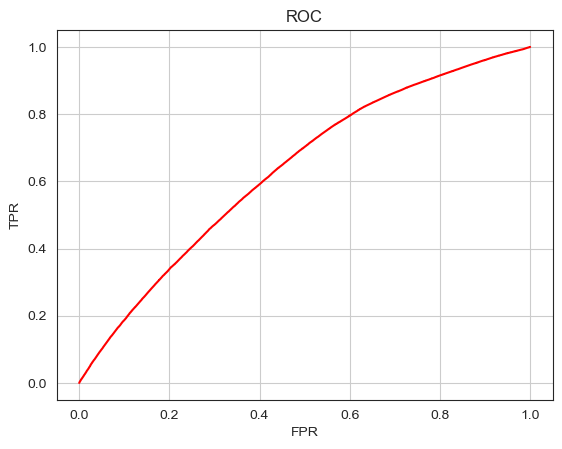

In [15]:
test_probas = pipeline.predict_proba(X_test)[:,1]

fpr, tpr, tresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr, color='red')
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

In [16]:
def _compute_accuracy_for_thresholds(data: pd.core.frame.DataFrame):
    """
    Compute Classifier's Accuracy for various thresholds
    """
    
    thresholds = np.linspace(0, 1, 100)
    
    accuracies = []
    
    for threshold in thresholds:
        preds = data['preds'].map(lambda x: 1 if x > threshold else 0)
        accuracy_ = accuracy_score(data['labels'].values, preds)
        accuracies.append(accuracy_)
    
    return accuracies, thresholds

In [17]:
X_test['preds'] = test_probas
X_test['labels'] = y_test

In [18]:
accuracies, thresholds = _compute_accuracy_for_thresholds(X_test)

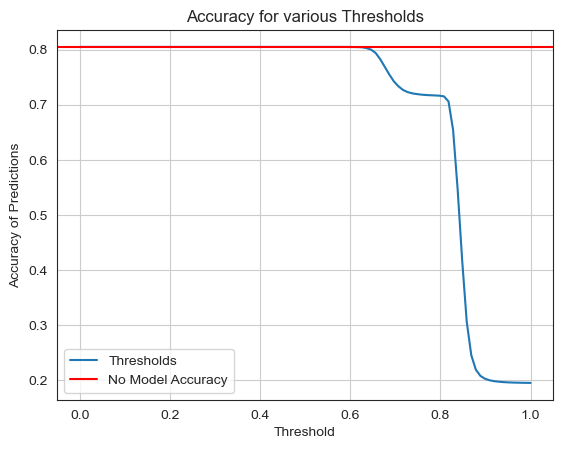

In [19]:
plt.plot(thresholds.reshape(-1, 1), accuracies, label='Thresholds')
plt.axhline(
    (X_test['labels'].sum()) / len(X_test), color='red', label='No Model Accuracy')
plt.grid()
plt.title('Accuracy for various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Accuracy of Predictions')
plt.legend()
plt.show()

In [20]:
accuracy_score(X_test['labels'].values, list(map(lambda x: 1 if x > 0.7 else 0, X_test['preds'])))

0.7393148089674771

Line 1: features = ['loan_amnt', 'annual_inc', 'term', 'emp_length']
Description: This line creates a list named "features" and with the name of columns: 'loan amut', 'annual inc', 'term' and 'emp length'.

Line 2: a = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', usecols=features+['loan_status'])
Description: This line uses package pandas to read the compressed file of accepted loans from 2007 to 2018, and only read specific columns of the database: columns from the list of features and "loan status". Store this extracted dataframe as "a".

Line 3: full_set = a.query("loan_status in ('Fully Paid', 'Charged Off')").copy()
Description: This line copies the whole dataframe of "a" at first, then select only the rows with loan status of "fully paid" or "charged off" and stored in "full_set". 

Line 4: full_set = full_set.dropna(subset=['emp_length'])
Description: This line removes rows from the column "emp length" of "full_set" which have missing values, then stores the remaining entries as the original dataframe "full_set".

Line 5: full_set['loan_status'] = full_set['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})
Description: This line replaces the values of the column "loan status": "fully paid" with categorical variable 1, and "charged off" with 0, respectively. 

Line 6: full_set['term'] = full_set['term'].replace({' 36 months': 36, ' 60 months': 60})
Description: This line replaces the values of the column "term: "36 months" with "36", and "60 months" with "60", respectively. 

Line 7: full_set['emp_length'] = full_set['emp_length'].map(lambda x: x.split(' ')[0])
Description: This line uses the lambda function to check each entry of the column "emp length" separately, each entry is treated as x, the function returns the first part of each x after splitting using space as a separator.

Line 8: full_set['emp_length'] = full_set['emp_length'].map(lambda x: str(x).replace('+', '').replace('<', '0'))
Description: This line uses the lambda function to check each entry of the column "emp length" separately, each entry is treated as x and transformed as a string, the function replaces any character "+" with a space as a separator, or any character "<" with "0".

Line 9: model_features = list(full_set.columns)
Description: This line creates a variable "model_features" that contains a list of columns in the dataframe "full_set".

Line 10: model_features.remove('loan_status')
Description: This line removes the element "loan_status" from the list "model_features".

## 3.3

Our machine learning model is decision tree classifier, we will use the same variables as defined in part 3.2. Then we will predict our data (X_test) using the model generated by our training data (X_train and y_train). Finally, we will compare the accuracy of X_test and y_test between Suranas'and our methods. 

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
#features = ['loan_amnt', 'annual_inc', 'term', 'emp_length']

#a = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', usecols=features+['loan_status'])

#full_set = a.query("loan_status in ('Fully Paid', 'Charged Off')").copy()

#full_set = full_set.dropna(subset=['emp_length'])

#full_set.head()

#full_set['loan_status'] = full_set['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})

#full_set['term'] = full_set['term'].replace({'36 months': 36, '60 months': 60})

#full_set['emp_length'] = full_set['emp_length'].map(lambda x: x.split(' ')[0])

#full_set['emp_length'] = full_set['emp_length'].map(lambda x: str(x).replace('+', '').replace('<', '0'))

#model_features = list(full_set.columns)

#model_features.remove('loan_status')

#full_set.head()

#X_train, X_test, y_train, y_test = train_test_split(full_set[model_features],full_set['loan_status'],random_state=42)

In [23]:
#Remove the excessive columns from testing data of X.
X_test = X_test.drop(columns = ['preds', 'labels'])

#Use decision tree classifier as the algorithm for our machine learning model.
classifier = DecisionTreeClassifier()

#Fit the training data of X and Y.
classifier = classifier.fit(X_train, y_train)

#Use the decision tree classifier model to generating our testing data of X.
x_test_preds = classifier.predict(X_test)

#Compare the accuracy between the testing data of X and the actual testing data, Y.
accuracy = accuracy_score(y_test, x_test_preds)

In [24]:
accuracy

0.7500378907483423

From our model (Decision tree classifier), 75% of our predicted data (X_test) is actually correctly predicted, it is slightly higher than the chosen method (Logistic Regression) in part 3.2.